In [1]:
import pandas as pd
import os

In [2]:
results_euc = pd.read_csv("./results/roc_auc_euclidean.csv", index_col=0)

results_cos = pd.read_csv("./results/roc_auc_cosine.csv", index_col=0)

results_man = pd.read_csv("./results/roc_auc_manhattan.csv", index_col=0)

In [3]:
dataset_names = [x[:-3] for x in os.listdir("./data/downloaders") if x[-3:] == ".py"]

In [4]:
def get_per_dataset_results(results_df):    
    return [results_df[[col for col in results_df.columns if dataset_name in col]].T.mean() for dataset_name in dataset_names]

# Cosine distance results

In [8]:
results_cos = results_cos.append(ardoc_df)
results_cos = results_cos.append(stanik_df)

cos_results = pd.DataFrame(get_per_dataset_results(results_cos), index=dataset_names)
cos_results.loc['mean'] = cos_results.mean()

In [9]:
cos_results[["concat_use_large_sbert_large", "Stanik app model"]]

,concat_use_large_sbert_large,Stanik app model
chen_2014,0.674152,0.771207
ciurumelea_2017,0.700898,0.552878
di_sorbo_2016,0.661849,0.766035
guzman_2015,0.760453,0.792371
maalej_2016,0.772894,0.749306
scalabrino_2017,0.707247,0.629138
tizard_2019,0.676379,0.624443
williams_2017,0.613350,0.678275
mean,0.695903,0.695457


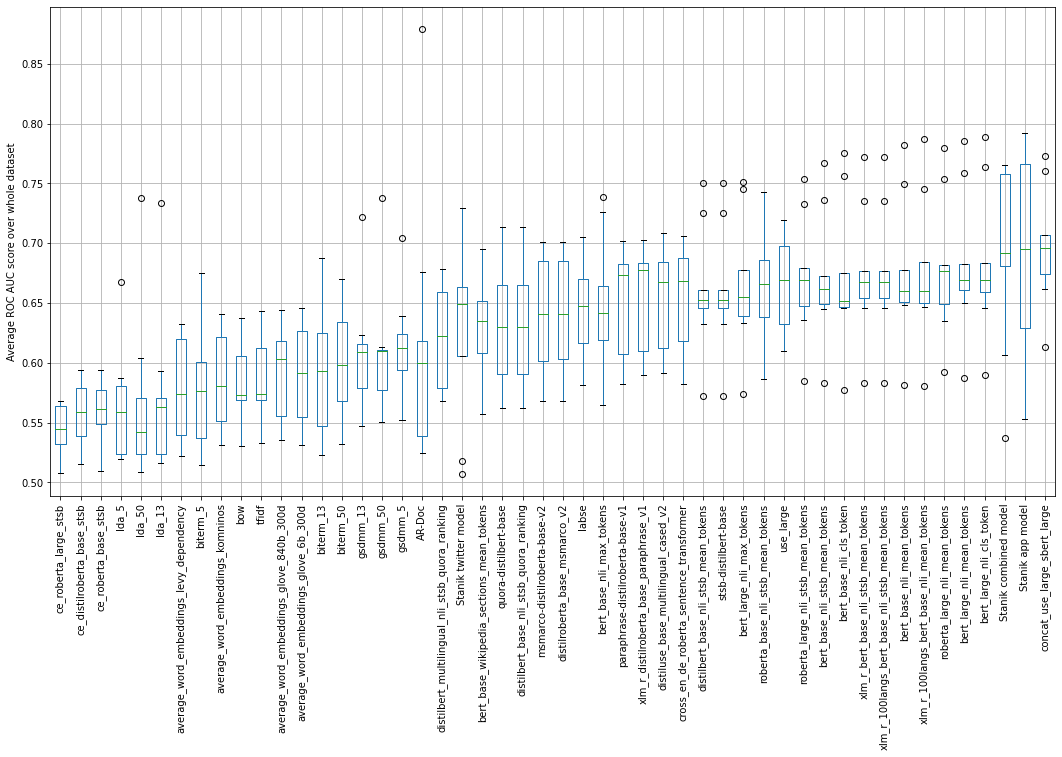

In [10]:
embedding_order = cos_results.mean().sort_values().index.tolist()

embedding_order.remove("concat_distiluse_sbert_large")
embedding_order.remove('concat_use_large_sbert_large_labse')
embedding_order.remove('concat_use_large_sroberta_large')
embedding_order.remove('concat_use_large_sbert_large_pca')

ax = cos_results.loc[:,embedding_order].boxplot(rot=90, figsize=(18,9))
ax.set_ylabel("Average ROC AUC score over whole dataset")


fig = ax.get_figure()
fig.savefig("dataset_results.svg", bbox_inches="tight", pad_inches=0.2)

In [17]:


cos_results.loc[:, embedding_order]

,ce_roberta_large_stsb,ce_distilroberta_base_stsb,ce_roberta_base_stsb,lda_5,lda_50,lda_13,average_word_embeddings_levy_dependency,biterm_5,average_word_embeddings_komninos,bow,...,xlm_r_bert_base_nli_stsb_mean_tokens,xlm_r_100langs_bert_base_nli_stsb_mean_tokens,bert_base_nli_mean_tokens,xlm_r_100langs_bert_base_nli_mean_tokens,roberta_large_nli_mean_tokens,bert_large_nli_mean_tokens,bert_large_nli_cls_token,Stanik combined model,Stanik app model,concat_use_large_sbert_large
chen_2014,0.544755,0.523794,0.547651,0.555189,0.542267,0.543285,0.522464,0.573975,0.535542,0.530708,...,0.645794,0.645794,0.656746,0.659280,0.671218,0.669320,0.669498,0.760610,0.771207,0.674152
ciurumelea_2017,0.558846,0.585789,0.592945,0.558652,0.541988,0.569254,0.632537,0.600933,0.641187,0.617634,...,0.676649,0.676649,0.678027,0.684618,0.681965,0.680532,0.683349,0.537405,0.552878,0.700898
di_sorbo_2016,0.564100,0.539081,0.566399,0.587291,0.604294,0.593429,0.539330,0.576511,0.551311,0.572809,...,0.661529,0.661529,0.660368,0.660137,0.634953,0.661287,0.665522,0.757672,0.766035,0.661849
guzman_2015,0.520464,0.558967,0.548511,0.521188,0.519734,0.522674,0.620083,0.536964,0.621429,0.605558,...,0.735358,0.735358,0.749386,0.745017,0.753476,0.758361,0.764111,0.765736,0.792371,0.760453
maalej_2016,0.564502,0.594227,0.593633,0.667822,0.738136,0.733794,0.541961,0.675467,0.553693,0.572762,...,0.771736,0.771736,0.781946,0.786966,0.779804,0.785812,0.788491,0.738354,0.749306,0.772894
scalabrino_2017,0.567988,0.579318,0.577492,0.580831,0.570480,0.563054,0.628632,0.638562,0.639396,0.637458,...,0.667630,0.667630,0.650954,0.649618,0.676592,0.666694,0.659091,0.606674,0.629138,0.707247
tizard_2019,0.531807,0.569465,0.558077,0.523836,0.508960,0.516680,0.580656,0.523144,0.580894,0.568806,...,0.654229,0.654229,0.648154,0.646877,0.648808,0.649700,0.645568,0.680598,0.624443,0.676379
williams_2017,0.508094,0.515464,0.509517,0.520021,0.523933,0.524187,0.525870,0.514273,0.531477,0.556928,...,0.582911,0.582911,0.581729,0.580492,0.591938,0.587243,0.590191,0.685128,0.678275,0.613350
mean,0.545070,0.558263,0.561778,0.564354,0.568724,0.570795,0.573942,0.579979,0.581866,0.582833,...,0.674480,0.674480,0.675914,0.676626,0.679844,0.682369,0.683228,0.691522,0.695457,0.695903


In [12]:
cos_results.mean().sort_values()

ce_roberta_large_stsb                             0.545070
ce_distilroberta_base_stsb                        0.558263
ce_roberta_base_stsb                              0.561778
lda_5                                             0.564354
lda_50                                            0.568724
lda_13                                            0.570795
average_word_embeddings_levy_dependency           0.573942
biterm_5                                          0.579979
average_word_embeddings_komninos                  0.581866
bow                                               0.582833
tfidf                                             0.585796
average_word_embeddings_glove_840b_300d           0.591108
average_word_embeddings_glove_6b_300d             0.591355
biterm_13                                         0.592934
biterm_50                                         0.598345
gsdmm_13                                          0.608727
gsdmm_50                                          0.6095

# Manhattan distance results

In [117]:
# pd.DataFrame(get_per_dataset_results(results_man), index=dataset_names).mean().sort_values()

# Euclidean distance results

In [116]:
# pd.DataFrame(get_per_dataset_results(results_euc), index=dataset_names).mean().sort_values()